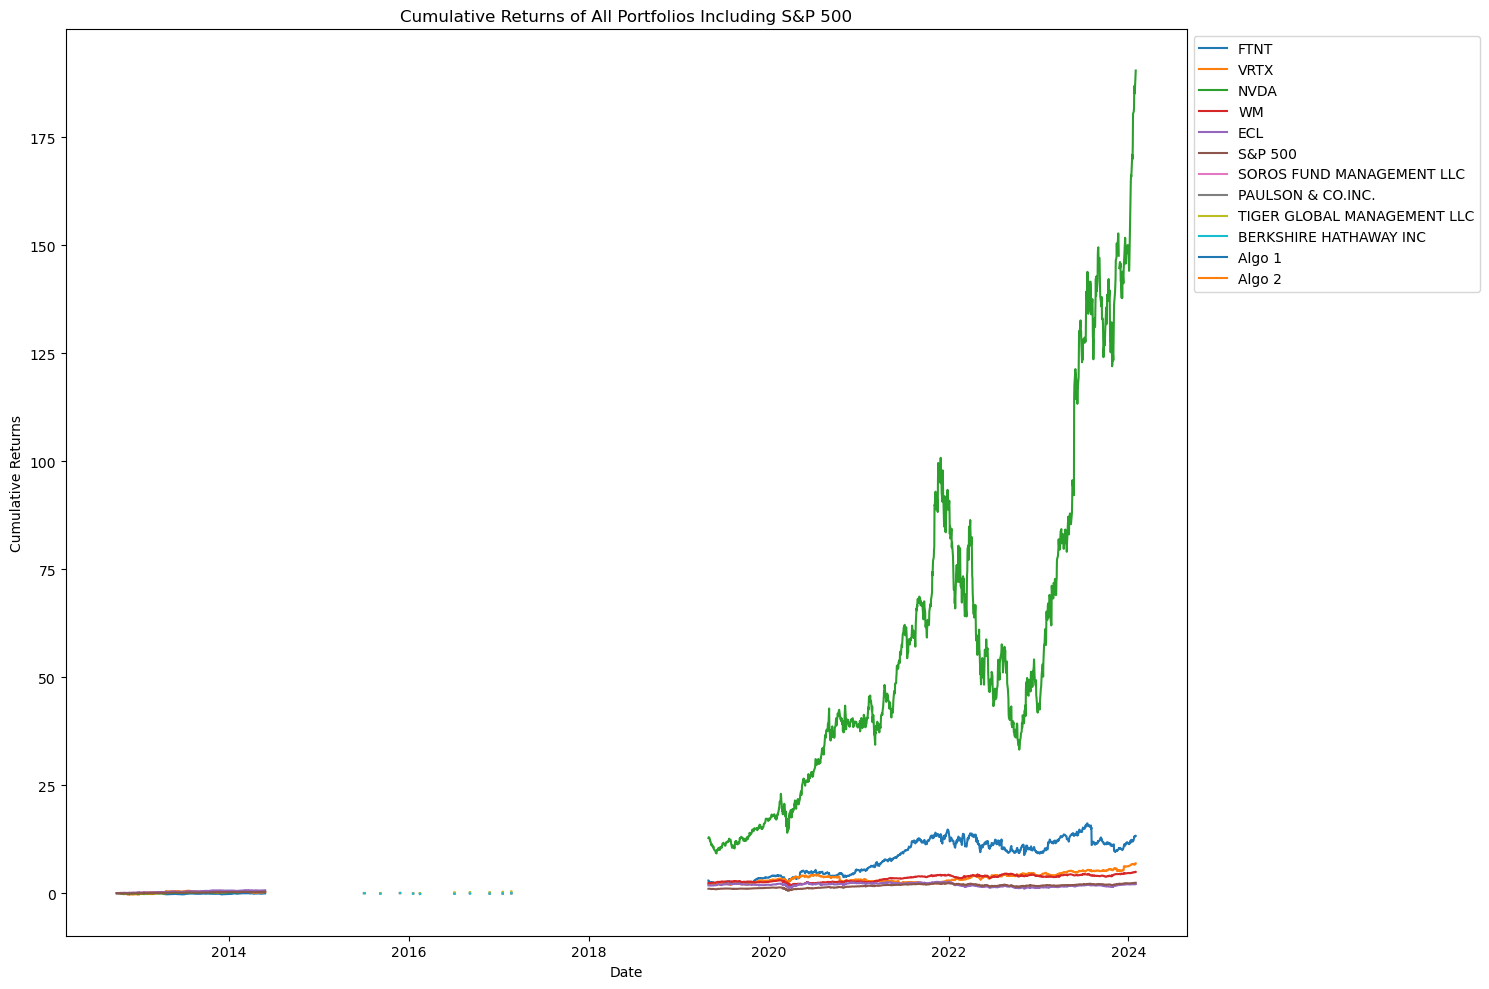

C:\Users\jan\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


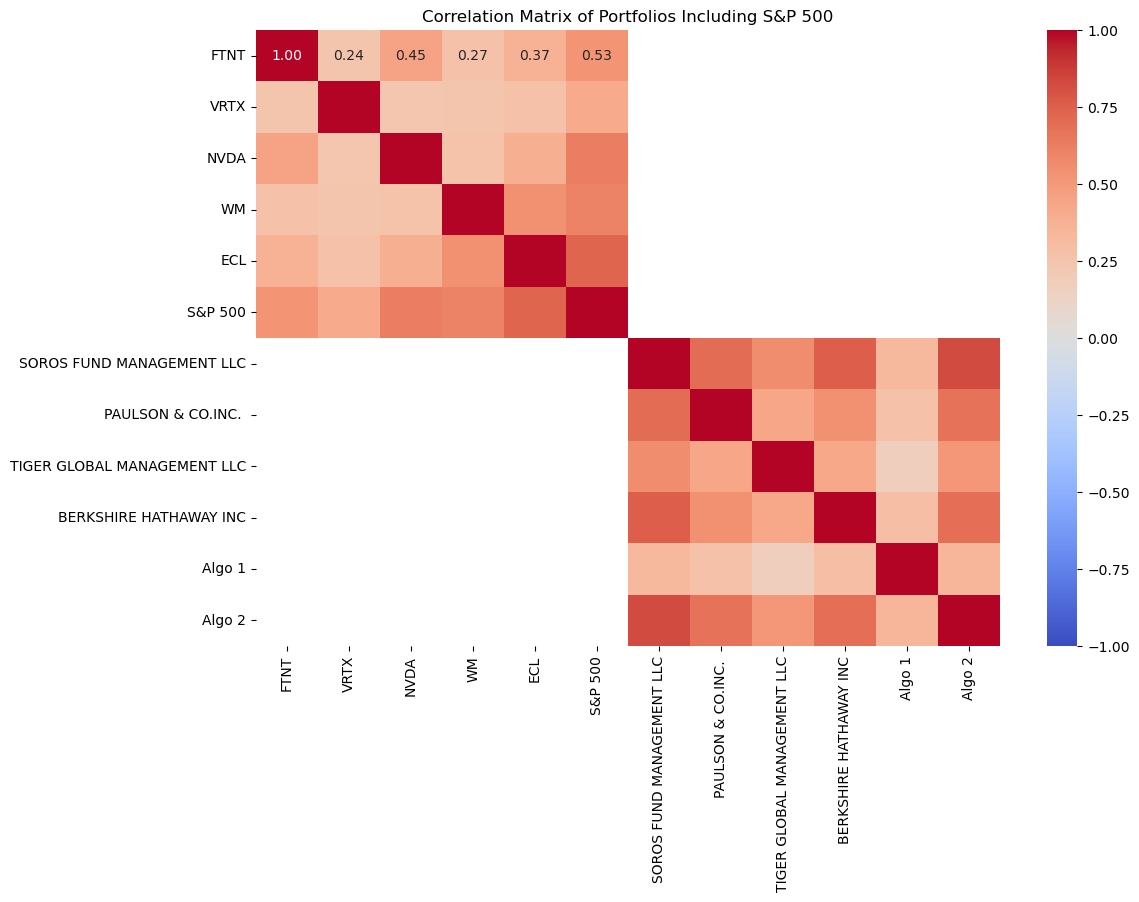

DataFrame exported to 'combined_portfolio_returns.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Function to read and prepare the stock data
def read_and_prepare_stock_data(filename):
    df = pd.read_csv(filename, index_col='Date', parse_dates=['Date'])
    return df['Close'].pct_change().dropna()

# Read the individual stock data and S&P 500 Index data
stocks_filenames = {
    'FTNT': 'FTNT.csv',
    'VRTX': 'VRTX.csv',
    'NVDA': 'NVDA.csv',
    'WM': 'WM.csv',
    'ECL': 'ECL.csv',
    'S&P 500': 'SP500_INDEXSP_INX.csv'
}
stocks_data = {stock: read_and_prepare_stock_data(filename) for stock, filename in stocks_filenames.items() if stock != 'S&P 500'}
stocks_data['S&P 500'] = read_and_prepare_stock_data(stocks_filenames['S&P 500'])

# Read Whale Returns and Algorithmic Returns data without applying percent change
whale = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=['Date'])
algo = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=['Date'])

# Combine all data into a single DataFrame
combined_returns = pd.concat([*stocks_data.values(), whale, algo], axis=1)
combined_returns.columns = list(stocks_filenames.keys()) + list(whale.columns) + list(algo.columns)

# Plotting cumulative returns
cumulative_returns = (1 + combined_returns).cumprod() - 1
plt.figure(figsize=(15, 10))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title('Cumulative Returns of All Portfolios Including S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plotting the correlation matrix
correlation_matrix = combined_returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Portfolios Including S&P 500')
plt.show()

# Export the combined DataFrame to a CSV file
combined_returns.to_csv('combined_portfolio_returns.csv', index=True)
print("DataFrame exported to 'combined_portfolio_returns.csv'")
